# <b> Regression with AutoMPG dataset
    
In a regression problem, we aim to predict the output of a continuous value, like a price or a probability. Contrast this with a classification problem, where we aim to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This notebook uses the classic Auto MPG Dataset and builds a model to predict the fuel efficiency of late-1970s and early 1980s automobiles. To do this, we'll provide the model with a description of many automobiles from that time period. This description includes attributes like: cylinders, displacement, horsepower, and weight.

#### <b> Imports

In [28]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import tensorflow as tf, keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#### <b> Access from UCI URL

In [29]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/home/carina/.keras/datasets/auto-mpg.data'

#### <b> Prepare Columns Names

In [30]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

#### <b> Load Dataset and Look at Some Rows

In [31]:
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


#### <b> Clean Data

#### <b> Search Missing Values

In [32]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

#### <b> Drop Missing Values

In [33]:
dataset = dataset.dropna()

In [34]:
dataset.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

#### <b> Split the Data into Train and Test

In [35]:
train = dataset.sample(frac = 0.8, random_state = 0)
test = dataset.drop(train.index)

#### <b> Inspect Data

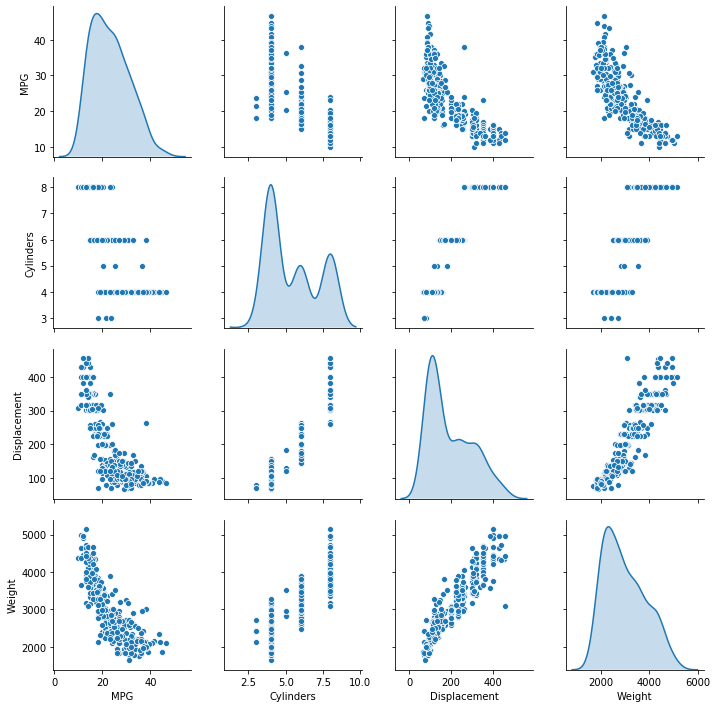

In [36]:
sea.pairplot(train[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind='kde')

#### <b> Analyse Data

In [37]:
train_stats = train.describe()
train_stats

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,1.573248
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.800988
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,1.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,3.000000


In [38]:
# pop target from result
train_stats.pop('MPG')

count    314.000000
mean      23.310510
std        7.728652
min       10.000000
25%       17.000000
50%       22.000000
75%       28.950000
max       46.600000
Name: MPG, dtype: float64

In [39]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.00,3.0


#### <b> Split Features from Labels

In [40]:
train_labels = train.pop('MPG')
test_labels = test.pop('MPG')

#### <b> Normalize Data

It is good practice to normalize features that use different scales and ranges. 

Although the model might converge without feature normalization, it makes training 

more difficult, and it makes the resulting model dependent on the choice of units

used in the input.

In [41]:
def Normalize(data):
    return (data - train_stats['mean']) / train_stats['std']

In [42]:
normed_train_data = Normalize(train)
normed_test_data = Normalize(test)

In [43]:
normed_train_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,-0.715676
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,-0.715676
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,-0.715676
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,-0.715676
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,1.781239


In [44]:
normed_test_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
9,1.483887,1.865988,2.234620,1.018782,-2.530891,-1.604642,-0.715676
25,1.483887,1.578444,2.890853,1.925289,-0.559020,-1.604642,-0.715676
28,1.483887,1.041693,2.313368,2.063931,1.054328,-1.604642,-0.715676
31,-0.869348,-0.789008,-0.259066,-0.903250,-0.559020,-1.332580,1.781239
33,0.307270,0.351586,-0.127819,-0.422150,-0.917542,-1.332580,-0.715676


#### <b> Build the Model

In [45]:
def BuildTheModel():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [46]:
model = BuildTheModel()

#### <b> Inspect the Model

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [49]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.543271,0.968740,2.543271,8.784640,2.319993,8.784640,995
996,2.561761,0.996147,2.561760,8.798333,2.322104,8.798332,996
997,2.597051,0.980582,2.597051,9.311221,2.366018,9.311221,997
998,2.471396,0.981101,2.471396,9.852039,2.470467,9.852039,998
999,2.620004,1.024314,2.620004,8.945598,2.359792,8.945599,999


In [50]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


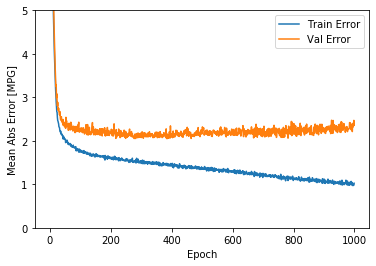

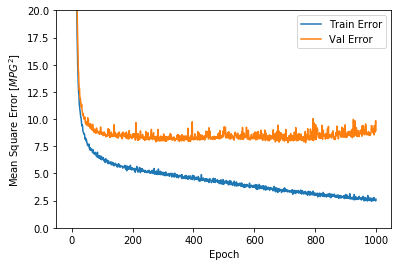

In [51]:
plot_history(history)


....................................................................................................
..................

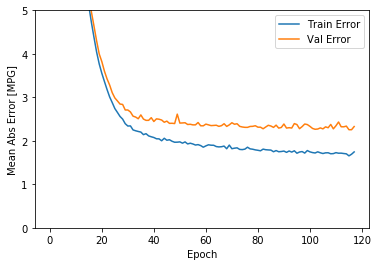

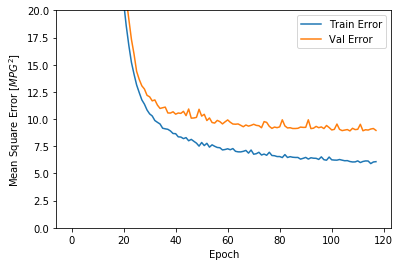

In [52]:
model = BuildTheModel()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [53]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.95 MPG


#### <b> Make Predictions

In [54]:
test_predictions = model.predict(normed_test_data).flatten()

In [59]:
test_predictions[0], train_labels[0]

(16.360344, 18.0)

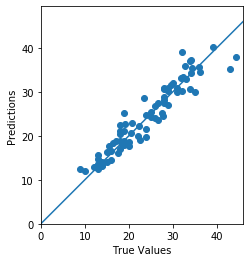

In [61]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).

Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).

When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.

If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.

Early stopping is a useful technique to prevent overfitting.
